In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.tree import plot_tree

In [19]:
# read titanic data
titanic_df = pd.read_csv('data/titanic_cleaned_data.csv')

# define X and y
# Port of Embarkation: Q = Queenstown, S = Southampton
feature_cols = ['Pclass', 'Sex', 'Embarked_Q', 'Embarked_S']
X = titanic_df[feature_cols]
y = titanic_df.Survived
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
titanic_df['Embarked_S'].unique()

array([1, 0])

In [25]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(Xtrain, ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8170144462279294
Testing accuracy : 0.7985074626865671


## Decision Tree
* What is the tree structure? 
    + Root node: no parent nodes
    + Leaf node: no child nodes
    + Intermediate node
* How to use the tree for classification?
    + What does each node need to include?
    + How to construct a criterion to measure the quality of a split?

What does each node need to include for different [Decision Tree Algorithms](https://scikit-learn.org/stable/modules/tree.html)?
* ID3 (Iterative Dichotomiser 3) 
    + Tree structure: A multiway tree. It "converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules"
    + Criteria: Information gain for categorical targets
    <!-- + Find for each node in a greedy manner -->
    + Categorical feature 


* C4.5 (Successor of ID3)
    + Can use continuous features: remove the restriction in ID3 that "features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals"
    <!-- + "The accuracy of each rule is then evaluated to determine the order in which they should be applied" -->


* CART (Classification and Regression Tree) using Gini impurity: it supports numerical target variables (regression) 
    + Tree structure: binary trees 
    + Criteria: Information gain
    + Find the feature and threshold that yield the largest information gain at each node    

* What are the paramters for this algorithm?
 <!-- Feature for splitting, split criterion, samples, final/temporary decision, tree structure (the number of child nodes)-->

In [6]:
tree_ds = treeclf.tree_
print("Number of nodes: {}".format(tree_ds.node_count))
print("Max depth: {}".format(tree_ds.max_depth))

node_idx = 0
# the entire binary tree structure, represented as a number of parallel arrays
print(f"Feature of each node: {tree_ds.feature[node_idx]}")

# the threshold of each node
print(f"Threshold of each node: {tree_ds.threshold[node_idx]}")

# the child of each node
print(f"Children of node {node_idx}: {tree_ds.children_left[node_idx]}, {tree_ds.children_right[node_idx]}")

# the impurity at each node
print(tree_ds.impurity[node_idx])


Number of nodes: 29
Max depth: 4
Feature of each node: 1
Threshold of each node: 0.5
Children of node 0: 1, 16
0.4666077515465219


* Criteria
    + Gini impurity $=1-\sum_{j=1}^c p_j^2$
    + Entropy $=\sum_{i=1}^c-p_i \log _2 p_i$
    + Information gain =entropy (parent)-[weightes average] * entropy (children)



Gini Impurity: $\operatorname{Gini}(E)=1-\sum_{j=1}^c p_j^2$

In [27]:
def gini_impurity(y):
    """Calculate the gini impurity for a list of classes.
    args:
        y: a list of classes
    """
    # count the occurrences of each class
    hist = np.bincount(y)
    # and then calculate the gini impurity
    impurity = 1 - np.sum([(i / len(y)) ** 2 for i in hist])
    return impurity
# calculate gini impurity for the root node
print("The gini impurity for the root node is: ", gini_impurity(ytrain))


The gini impurity for the root node is:  0.4666077515465219


In [28]:

# split the data by Pclass
Xtrain_1 = Xtrain[Xtrain['Pclass'] == 1]
ytrain_1 = ytrain[Xtrain['Pclass'] == 1]
Xtrain_2 = Xtrain[Xtrain['Pclass'] == 2]
ytrain_2 = ytrain[Xtrain['Pclass'] == 2]
Xtrain_3 = Xtrain[Xtrain['Pclass'] == 3]
ytrain_3 = ytrain[Xtrain['Pclass'] == 3]

# calculate gini impurity for each split
print("The gini impurity for the split on Pclass = 1 is: ", gini_impurity(ytrain_1))
print("The gini impurity for the split on Pclass = 2 is: ", gini_impurity(ytrain_2))
print("The gini impurity for the split on Pclass = 3 is: ", gini_impurity(ytrain_3))

# Average gini impurity for the split
print("The average gini impurity for the split on Pclass is: ", (len(ytrain_1) * gini_impurity(ytrain_1) + len(ytrain_2) * gini_impurity(ytrain_2) + len(ytrain_3) * gini_impurity(ytrain_3)) / len(ytrain))

The gini impurity for the split on Pclass = 1 is:  0.4811345168469541
The gini impurity for the split on Pclass = 2 is:  0.49896694214876036
The gini impurity for the split on Pclass = 3 is:  0.366331998966942
The average gini impurity for the split on Pclass is:  0.4200484716560619


In [14]:
# split the data by Sex
Xtrain_1 = Xtrain[Xtrain['Sex'] == 1]
ytrain_1 = ytrain[Xtrain['Sex'] == 1]
Xtrain_2 = Xtrain[Xtrain['Sex'] == 0]
ytrain_2 = ytrain[Xtrain['Sex'] == 0]

# calculate gini impurity for each split
print("The gini impurity for the split on Sex = 1 is: ", gini_impurity(ytrain_1))
print("The gini impurity for the split on Sex = 0 is: ", gini_impurity(ytrain_2))

# Average gini impurity for the split
print("The average gini impurity for the split on Pclass is: ", (len(ytrain_1) * gini_impurity(ytrain_1) + len(ytrain_2) * gini_impurity(ytrain_2) ) / len(ytrain))

The gini impurity for the split on Sex = 1 is:  0.30201070791195717
The gini impurity for the split on Sex = 0 is:  0.39630584760519305
The average gini impurity for the split on Pclass is:  0.3342496561537858


Entropy $=\sum_{i=1}^c-p_i \log _2 p_i$

In [29]:
def entropy(y):
    """Calculate the entropy for a list of classes.
    args:
        y: a list of classes
    """
    # count the occurrences of each class
    hist = np.bincount(y)
    # and then calculate the entropy
    entropy = -np.sum([(i / len(y)) * np.log2(i / len(y)) for i in hist if i > 0])
    return entropy

Let's see how the change of probability affects the entropy.

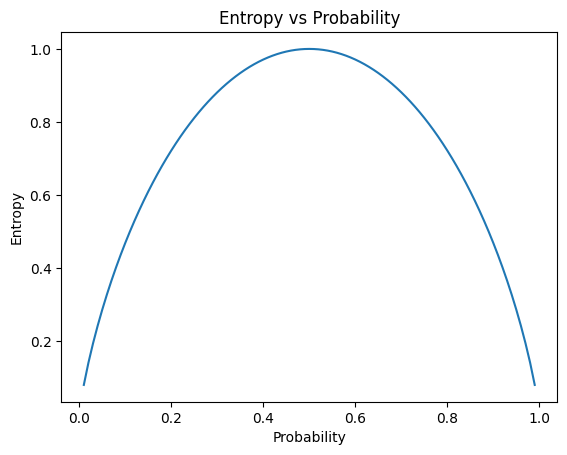

In [30]:
# Define probability values
probabilities = np.arange(0.01, 1.0, 0.01)

# Calculate entropy values for each probability
entropy_values = [-p*np.log2(p) - (1-p)*np.log2(1-p) for p in probabilities]

# Plot the graph
plt.plot(probabilities, entropy_values)
plt.title("Entropy vs Probability")
plt.xlabel("Probability")
plt.ylabel("Entropy")
plt.show()

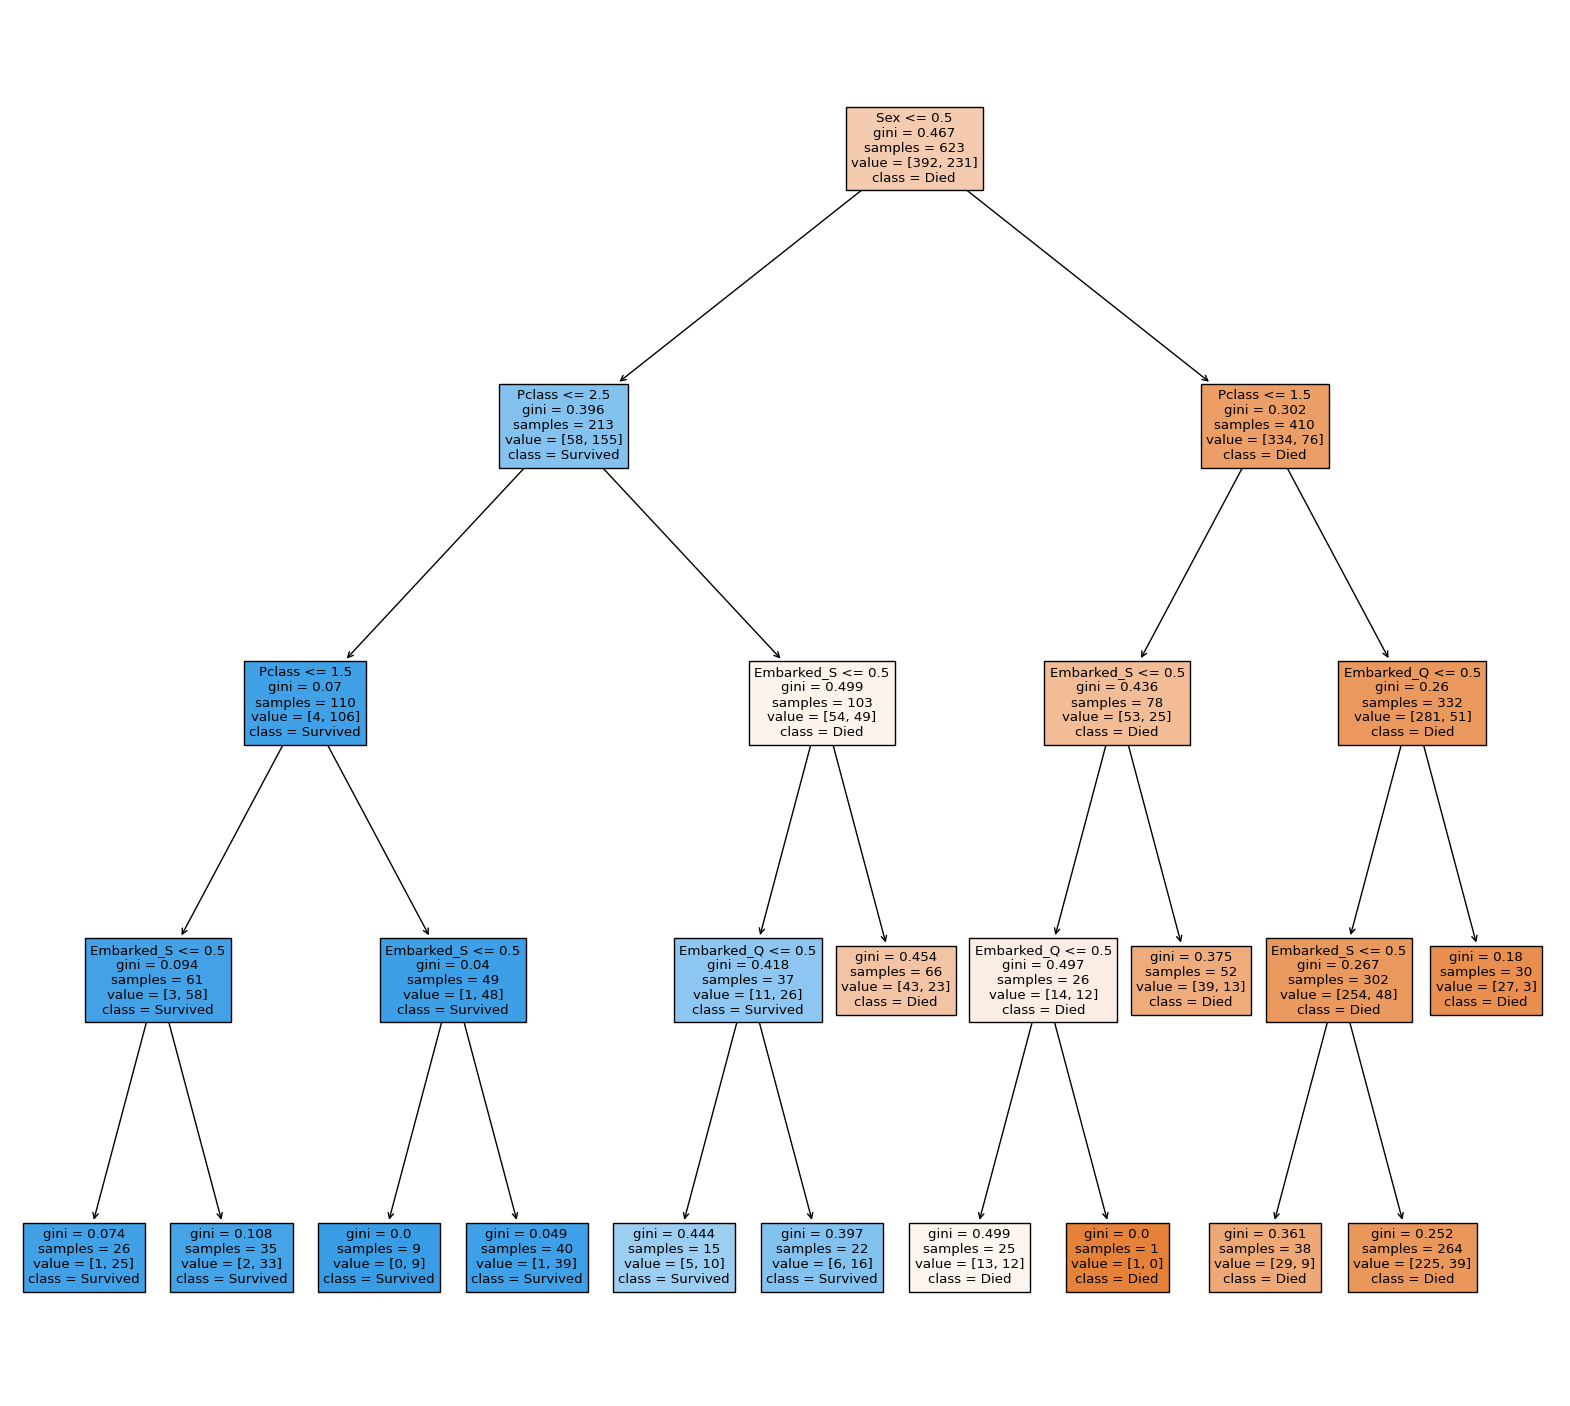

In [31]:
plt.figure(figsize=(20,18))
tree.plot_tree(treeclf, feature_names=feature_cols, class_names=['Died', 'Survived'], filled=True)
plt.show()

The effect of max_depth

Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

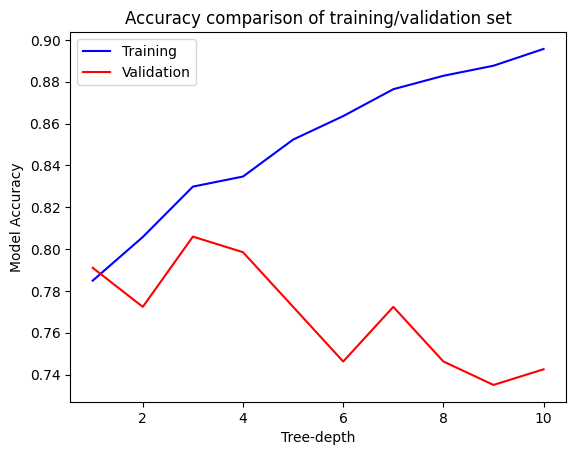

In [44]:
# depth takes values from 1 to 10
max_depth_range = range(1, 11)

valid_scores = []
train_scores = []
for depth in max_depth_range:
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    treeclf.fit(Xtrain, ytrain)

    scores = accuracy_score(ytest, treeclf.predict(Xtest))
    scores2 = accuracy_score(ytrain, treeclf.predict(Xtrain))

    valid_scores.append(scores)
    train_scores.append(scores2)
    
valid_scores = np.array(valid_scores)
train_scores = np.array(train_scores)
# print(f"The size of evaluation data is {len(ytest)}")



plt.plot(max_depth_range, train_scores, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, valid_scores, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

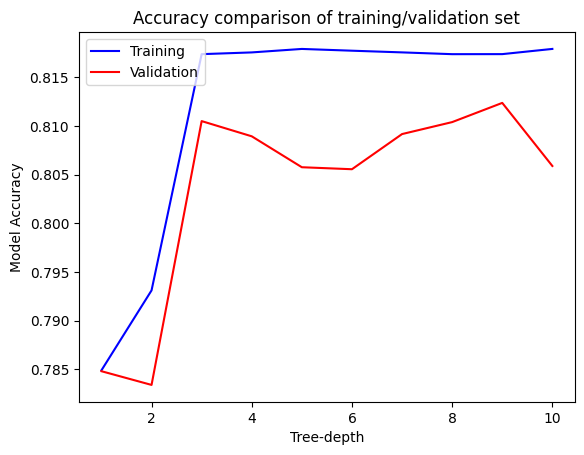

In [32]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

# depth takes values from 1 to 10
max_depth_range = range(1, 11)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
# store the mean value for each fold
valid_scores = []
train_scores = []
for depth in max_depth_range:
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    treeclf.fit(Xtrain, ytrain)

    
    
    # do cross validation via Kfold
    scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
    scores = []
    scores2 = []
    for train_index, test_index in kf.split(Xtrain):
        X_train, X_test = Xtrain.iloc[train_index], Xtrain.iloc[test_index]
        y_train, y_test = ytrain.iloc[train_index], ytrain.iloc[test_index]
        treeclf.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, treeclf.predict(X_test)))
        scores2.append(accuracy_score(y_train, treeclf.predict(X_train)))
    
    valid_scores.append(scores)
    train_scores.append(scores2)
valid_scores = np.array(valid_scores)
train_scores = np.array(train_scores)

# Simple API for plotting a validation curve given training and validation scores.
# train_scores, valid_scores = validation_curve( treeclf, Xtrain, ytrain, param_name="max_depth", param_range=max_depth_range, cv=10, scoring="accuracy")

# Mean accuracy score for each value of max-depth
train_scores = np.mean(train_scores, axis=1)
valid_scores   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, train_scores, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, valid_scores, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")


How to prevent the model from overfitting to the training set?
1. Use smaller tree-depth
2. Pre-pruning
    + Stop splitting nodes when the entropy reduction is not significant
    <!-- Sometimes attributes individually do not contribute much to a decision, but combined, they may have a significant impact -->
    + In Sk-learn, set parameters `min_samples_split` and `min_samples_leaf `
    + Difference between `min_samples_split` and `min_samples_leaf `
    <!-- + the distinction between a leaf (also called external node) and an internal node. An internal node will have further splits (also called children), while a leaf is by definition a node without any children (without any further splits).
    + min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.
    + For instance, if min_samples_split = 5, and there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If min_samples_leaf = 2, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node. -->
3. Post-pruning
    + "wait until the full decision tree has been built, then go for subtrees and check whether you can replace it with a single node or feature, while incurring only a small amount of change in Entropy."

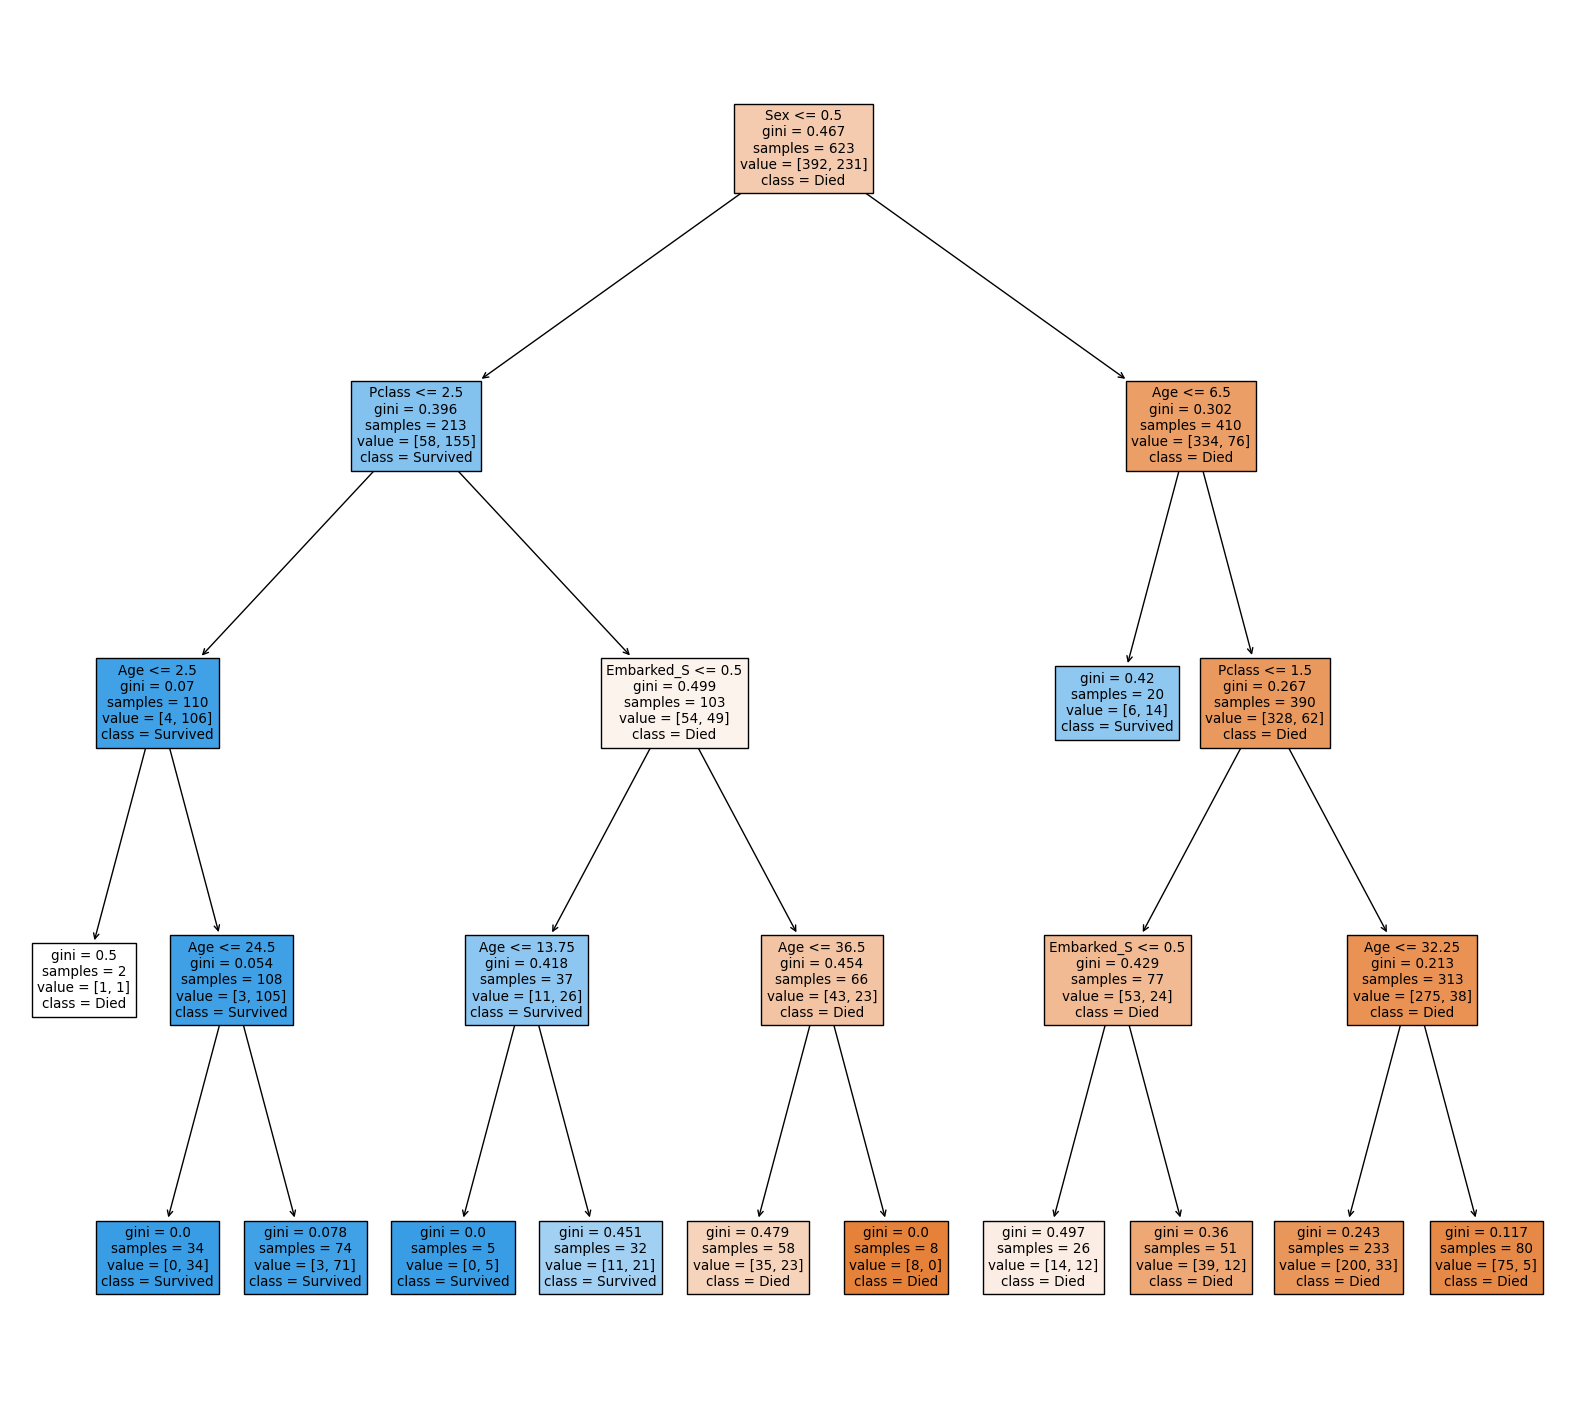

In [40]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1,  min_samples_split=37)
treeclf.fit(Xtrain, ytrain)
plt.figure(figsize=(20,18))
tree.plot_tree(treeclf, feature_names=feature_cols, class_names=['Died', 'Survived'], filled=True)
plt.show()

Post-pruning
* [Cost complexity pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)
    + [Code](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

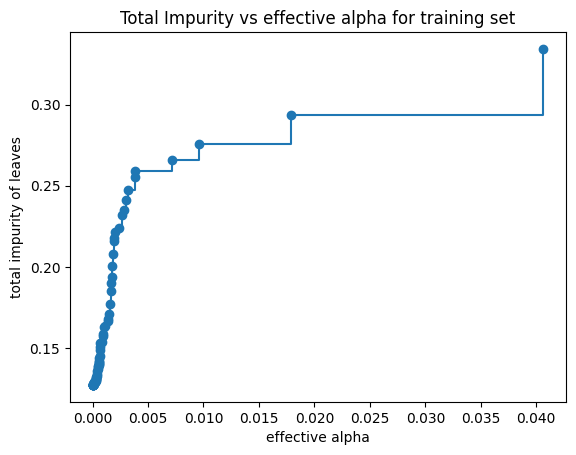

In [10]:
clf = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [16]:
# the last value in ccp_alphas is the alpha value that prunes the whole tree
for i in range(1, len(ccp_alphas)):
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[-i])
    clf.fit(X_train, y_train)
    print(
        "Number of nodes is: {} with ccp_alpha: {} and impurity: {}".format(
            clf.tree_.node_count, ccp_alphas[-i], impurities[-i]
        )
    )

Number of nodes is: 1 with ccp_alpha: 0.13235809539273619 and impurity: 0.46660775154652195
Number of nodes is: 3 with ccp_alpha: 0.040650744549143095 and impurity: 0.33424965615378577
Number of nodes is: 5 with ccp_alpha: 0.017876742787677258 and impurity: 0.2935989116046427
Number of nodes is: 7 with ccp_alpha: 0.009549734105204807 and impurity: 0.27572216881696543
Number of nodes is: 9 with ccp_alpha: 0.007183074653164256 and impurity: 0.2661724347117606
Number of nodes is: 11 with ccp_alpha: 0.0038523274478330666 and impurity: 0.25898936005859635
Number of nodes is: 13 with ccp_alpha: 0.003823891464340902 and impurity: 0.25513703261076326
Number of nodes is: 17 with ccp_alpha: 0.0032066195884192933 and impurity: 0.24748924968208144
Number of nodes is: 21 with ccp_alpha: 0.00302330093662357 and impurity: 0.24107601050524285
Number of nodes is: 25 with ccp_alpha: 0.0028297639476942554 and impurity: 0.23502940863199573
Number of nodes is: 27 with ccp_alpha: 0.0026535363614015295 and i

* Compared to Logistic Regression and SVM?
    + Non-parametric method: no functional form of underlying data distribution
    + Explicit decision rules or a piecewise constant approximation

## Pass Activity

In [ ]:
# Q1: Load "digits" datasets from SKlearn. 
# Classify digit classes using KNN. 
# Use the same data splitting and performance metrics that you have used in previous week (week 7). 
# Report your findings including comparison of results with week 7. 


# Q2: Create digits classification model using DT algorithm using 50-50% and 70-30% data splitting methods. 
# Compare performances of these two models and 
# explain impact of difference in data splitting on the performances of the model.


# Q3: Create two more KNN-based classification models using the dataset used in Q1 by varying distance metrics 
# such as using  cityblock and cosine.
# Report the performances of the developed models including Q1 and explain the similarity or differences if any.

